<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Fouriergeneralizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SERIES DE FOURIER GENERALIZADAS

##1.Verificar y resolver el problema de Strum-louville


$ f''(x) + 2f'(x) + \lambda f(x) = 0,\quad \text{con } f(0) = f(1) = 0$


In [29]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()




####Definimos las variables

In [30]:
x, lmb = sp.symbols('x lambda', real=True)
f = sp.Function('f')

Paso 1: Verificación de que es un problema de Sturm–Liouville

Multiplicamos la ecuación por un **factor integrador** $ \mu(x) = e^{2x} $:

$
e^{2x} f'' + 2e^{2x} f' + \lambda e^{2x} f = \frac{d}{dx} \left( e^{2x} f' \right) + \lambda e^{2x} f = 0
$

Esto es exactamente de la forma:

$
\frac{d}{dx}\left[ p(x) f' \right] + \left[ \lambda w(x) - q(x) \right] f = 0
$
Con:

- $ p(x) = e^{2x} $
- $w(x)= e^{2x}$
- $ q(x)= 0$



In [31]:
mu = sp.exp(2*x)
sl_form = sp.simplify(sp.diff(mu * sp.diff(f(x), x), x) + mu * lmb * f(x))
sl_form  # Confirma forma de Sturm-Liouville

⎛                       2       ⎞     
⎜           d          d        ⎟  2⋅x
⎜λ⋅f(x) + 2⋅──(f(x)) + ───(f(x))⎟⋅ℯ   
⎜           dx           2      ⎟     
⎝                      dx       ⎠     

Resolvemos la ecuacion de manera general

In [32]:
sol=sp.dsolve(f(x).diff(x,2)+2*f(x).diff(x)+lmb*f(x),f(x))
f_gen=sol.rhs
f_gen

      ⎛  _______    ⎞          ⎛  _______    ⎞
    x⋅⎝╲╱ 1 - λ  - 1⎠       -x⋅⎝╲╱ 1 - λ  + 1⎠
C₁⋅ℯ                  + C₂⋅ℯ                  

Aplicamos condiciones de frontera

Aplicamos $ f(0) = 0 \Rightarrow C_1 + C_2 = 0 \Rightarrow C_2 = -C_1 $

Sustituyendo en la solución:

$f(x) = C_1 e^{-x} \left( e^{r x} - e^{-r x} \right) = C_1 e^{-x} \cdot 2\sinh(rx) $

Con $r = \sqrt{1 - \lambda} $

Aplicamos $ f(1) = 0 $

$f(1) = C_1 e^{-1} \cdot 2\sinh(r) = 0 \Rightarrow \sinh(r) = 0 \Rightarrow r = n\pi i \Rightarrow \sqrt{1 - \lambda} = n\pi i $

Elevando al cuadrado:
$1 - \lambda = -n^2\pi^2 \Rightarrow \lambda_n = 1 + n^2\pi^2$


In [33]:

C1, C2 = sp.symbols('C1 C2')
r = sp.sqrt(1 - lmb)
f_expr = sp.exp(-x) * (C1 * sp.exp(r*x) + C2 * sp.exp(-r*x))

# Aplicamos f(0) = 0:
f0 = sp.Eq(f_expr.subs(x, 0), 0)  # C1 + C2 = 0 => C2 = -C1

# Sustituimos C2 = -C1 en f(x)
f_expr_reducida = f_expr.subs(C2, -C1)

# Aplicamos f(1) = 0 para obtener la ecuación para lambda
f1 = sp.simplify(f_expr_reducida.subs(x, 1))
f1_eq = sp.Eq(f1, 0)

# Esto nos lleva a: sinh(r) = 0 => r = n*pi*i => lambda_n = 1 + n^2*pi^2
# Confirmamos con SymPy que esta condición implica los autovalores correctos
n = sp.symbols('n', integer=True, positive=True)
lmb_n = 1 + n**2 * sp.pi**2
f_n = sp.exp(-x) * sp.sin(n * sp.pi * x)

lmb_n, f_n

⎛ 2  2       -x           ⎞
⎝π ⋅n  + 1, ℯ  ⋅sin(π⋅n⋅x)⎠


- **Autovalores:** $\lambda_n = 1 + n^2\pi^2 para n=1,2,3 ...$
- **Autofunciones:** $f_n(x) = e^{-x} \sin(n\pi x) n=1,2,3, ...$


##2. Usar las eigenfunciones de este problema para expandir en series de fourier genralizadas la función $ u(x) = e^{-x}$

Expandir la función:

$
u(x) = e^{-x}
$

como una serie de Fourier generalizada en términos de las autofunciones $f_n(x) = e^{-x} \sin(n\pi x) $

Fórmula de los coeficientes

La fórmula para los coeficientes \( c_n \) en una expansión de Fourier generalizada con peso \( w(x) \) es:

$
c_n = \frac{\int_0^1 u(x) f_n(x) w(x)\, dx}{\int_0^1 f_n^2(x)\, w(x)\, dx}
$

donde:

- $u(x) = e^{-x} $
- $f_n(x) = e^{-x} \sin(n\pi x)$
- $w(x) = e^{2x} $


In [34]:
# Variables simbólicas
x, n = sp.symbols('x n', real=True)
sp.init_printing()

# Definimos funciones
u = sp.exp(-x)
w = sp.exp(2*x)
f_n = sp.exp(-x) * sp.sin(n * sp.pi * x)

# Fórmula general para c_n
num = sp.integrate(u * f_n * w, (x, 0, 1))        # Numerador: ∫ sin(nπx)
den = sp.integrate(f_n**2 * w, (x, 0, 1))         # Denominador: ∫ sin²(nπx)
c_n = sp.simplify(num / den)

# Mostramos los primeros cinco c_n
for i in range(1, 10):
    cn_i = c_n.subs(n, i)
    cn_decimal = sp.N(cn_i, 6)  # Aproximación decimal
    print(f"c_{i} = {cn_i} ≈ {cn_decimal}")

c_1 = 4/pi ≈ 1.27324
c_2 = 0 ≈ 0
c_3 = 4/(3*pi) ≈ 0.424413
c_4 = 0 ≈ 0
c_5 = 4/(5*pi) ≈ 0.254648
c_6 = 0 ≈ 0
c_7 = 4/(7*pi) ≈ 0.181891
c_8 = 0 ≈ 0
c_9 = 4/(9*pi) ≈ 0.141471



La serie de Fourier generalizada al truncarla queda:

$
u(x) \approx \sum_{n=1}^5 c_n f_n(x) = \sum_{n=1}^5 c_n\, e^{-x} \sin(n\pi x)
$

Donde los coeficientes \( c_n \) se calculan simbólicamente usando SymPy.

In [35]:
# Parámetro: número de armónicos
N = 5# Cambia este valor si deseas más o menos términos

# Construcción de la serie truncada
serie = sum(c_n.subs(n, i) * sp.exp(-x) * sp.sin(i * sp.pi * x) for i in range(1, N + 1))

# Mostrar la expresión de la serie
print(f"Serie de Fourier generalizada truncada a {N} términos:")
sp.pprint(serie, use_unicode=True)

Serie de Fourier generalizada truncada a 5 términos:
   -x               -x                 -x           
4⋅ℯ  ⋅sin(π⋅x)   4⋅ℯ  ⋅sin(3⋅π⋅x)   4⋅ℯ  ⋅sin(5⋅π⋅x)
────────────── + ──────────────── + ────────────────
      π                3⋅π                5⋅π       


Grafica

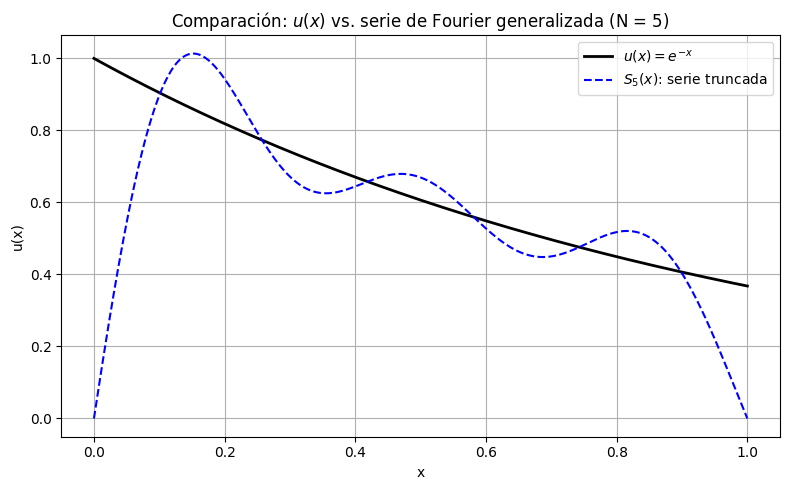

In [36]:

plt.figure(figsize=(8, 5))
plt.plot(x_vals, u_vals, label=r'$u(x) = e^{-x}$', linewidth=2, color='black')
plt.plot(x_vals, s_vals, label=fr'$S_{{{N}}}(x)$: serie truncada', linestyle='--', color='blue')
plt.title(fr'Comparación: $u(x)$ vs. serie de Fourier generalizada (N = {N})')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
